In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from LinReg import LinearRegressionGD
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,sep="\s+")

In [3]:
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df[["RM"]].values
y = df[["MEDV"]].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
#lr = LinearRegressionGD()
#lr.fit(X_std,y_std)

In [5]:
slr = LinearRegression()
slr.fit(X,y)
print("Slope: %.3f"%slr.coef_[0])
print("Intecept: %.3f"%slr.intercept_)

Slope: 9.102
Intecept: -34.671


/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [6]:
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
                         residual_metric=lambda x: np.sum(np.abs(x),axis=1),
                        residual_threshold=5.0,random_state=0)

In [7]:
ransac.fit(X,y)

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x10e1b4758>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [8]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Validating the model 

In [9]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)
slr = LinearRegression()
slr.fit(X,y)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [10]:
import analyze

In [11]:
def root_mean_square(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [12]:
pred = np.array([13.2154, 13.3087, 26.046, 31.1154, 43.2393, 43.529, 47.2477, 49.7314,
             51.2739, 52.519, 69.0447, 99.0274, 100.602, 105.927, 107.32, 109.704, 
             110.189, 116.93, 138.805, 141.817, 143.808, 145.435, 148.491, 150.1, 
             158.665, 164.178, 179.616, 194.594, 196.908, 197.853, 210.692, 
             219.495, 232.995, 235.364, 247.509, 249.617, 249.905, 263.748, 
             275.035, 280.675, 299.669, 307.825, 323.608, 338.441, 358.522, 
             359.266, 361.938, 362.779, 381.671, 386.736, 387.387, 390.604, 
             394.749, 397.748, 403.26, 422.59, 426.456, 430.124, 463.896, 465.628, 
             469.235, 486.139, 495.195, 496.369, 503.602, 507.368, 507.464, 
             512.866, 515.318, 530.051, 536.681, 540.991, 547.989, 550.543, 
             551.516, 558.961, 562.777, 563.561, 568.566, 571.072, 575.703, 
             584.326, 595.494, 598.264, 599.205, 608.308, 614.696, 620.553, 
             625.603, 646.01, 648.244, 649.384, 650.299, 660.308, 669.215, 
             689.213, 690.626, 694.542, 716.734, 725.68, 727.192, 739.174, 
             742.966, 747.814, 754.226, 756.638, 800.426, 804.632, 814.601, 
             814.709, 817.577, 821.148, 831.858, 834.237, 834.695, 842.084, 
             845.479, 856.743, 863.909, 866.408, 871.812, 877.217, 885.198, 
             888.477, 905.401, 907.661, 930.629, 936.11, 939.712, 965.354, 
             968.382, 971.867, 978.085, 978.59, 989.562, 992.424, 993.077, 
             1002.49, 1032.24, 1036.48, 1040.46, 1071.27, 1084.83, 1090.25, 
             1093.13, 1094.73, 1098.4, 1100.48, 1109.07, 1118.61, 1120.77, 
             1122.19, 1125.62, 1126.52, 1130.73, 1142.15, 1174.16, 1183.28, 
             1196.46, 1199.77, 1204.38, 1230.22, 1234.7, 1236.43, 1240.92, 
             1245.15, 1249.76, 1253.5, 1256.34, 1265.95, 1269.87, 1280.93, 
             1303.38, 1305.83, 1326.97, 1327.61, 1331.77, 1343.47, 1345.41, 
             1358.6, 1359.49, 1368.44, 1373.51, 1376.78, 1389.89, 1415.93, 
             1420.53, 1436.77, 1439.35, 1453.65, 1467.61, 1495.19, 1502.38, 
             1506.12, 1508.94, 1519.16, 1523.25, 1525.35, 1529.17, 1533.03, 
             1537.75, 1552.3, 1566.01, 1569.78, 1573.56, 1594.48, 1600.86, 1638.7, 
             1651.36, 1652.37, 1655.89, 1656.49, 1661.58, 1665.85, 1697.31, 
             1701.21, 1708.51, 1711.32, 1718.16, 1726.55, 1729.61, 1739.8, 
             1742.16, 1750., 1751.25, 1771.45, 1774.24, 1782.93, 1794.69, 1799.73, 
             1817.16, 1851.12, 1857.28, 1857.41, 1870.43, 1875.33, 1880.22, 
             1885.43, 1894.64, 1908.66, 1916.29, 1925.49, 1934.86, 1936.82, 
             1938.35, 1948.64, 1948.66, 1967.83, 1976.75, 1977.77])
y = np.array([436.184, 838.87, 1086.88, 543.855, -317.439, 469.256, 855.905, 
                 -189.96, -324.948, -504.842, -323.891, 79.235, -580.187, 117.262, 
                 553.91, -223.99, 463.614, 171.406, -995.414, 214.402, 982.453, 
                 198.647, 45.5689, 31.1794, -131.12, -246.684, 1213., 121.301, 
                 282.824, 766.721, -98.0378, -223.759, -315.438, 249.895, 351.322, 
                 345.681, 299.083, -215.982, 295.79, 108.844, 479.346, -276.414, 
                 -308.694, 648.286, 519.727, -309.27, 663.181, -481.484, 1141.1, 
                 424.464, 552.619, -727.66, 1056.8, 174.243, 35.3902, -253.84, 
                 1741.53, 844.341, 925.767, 437.873, 171.23, 1083.86, 539.938, 
                 1028.08, -759.307, 89.1555, 554.732, -415.321, 737.122, 1073.35, 
                 -294.081, -57.9412, 1108.75, 699.618, 814.287, 13.9176, 1263.85, 
                 618.367, 352.632, -200.289, -116.382, 688.263, 528.048, 947.192, 
                 1463.34, 418.755, 256.372, 1035.79, 829.849, 864.535, 1748.89, 
                 906.907, 898.373, 296.541, 865.984, -58.3793, -93.4651, 1838.91, 
                 657.355, 1166.23, 127.791, 769.665, 40.7196, 312.812, 2159.77, 
                 687.482, 863.89, 1670.75, 166.667, 896.545, 1254.28, 10.9434, 
                 995.749, 225.431, 377.946, 1704.36, -132.512, 1448.57, 1022.19, 
                 -103.367, 1013.96, 796.195, 635.713, 1370.61, 1186.67, 349.784, 
                 -34.3244, -35.5419, 325.247, 134.164, 1397.34, 601.652, 940.034, 
                 1503.59, 795.632, 572.459, 1356.04, 1567.42, 1295.85, 729.706, 
                 300.652, 973.256, 1390.42, 1277.78, 170.875, 952.821, 1858.19, 
                 1571.13, 1615.04, 1201.98, 2104.96, 1410.49, 1288.5, 1498.15, 
                 1563.32, 924.363, 360.647, 267.101, 725.078, 482.551, 1837.26, 
                 1477.22, 1775.75, 1441.84, 1408.28, 2590.14, 1915.61, 1051., 1507.46, 
                 1727.42, 1035.25, 1697.6, 891.752, 1420.06, 149.581, 1990.6, 1219.38, 
                 1772.07, 1203.16, 2103.51, 2207.6, 906.288, 1534.38, 1340.05, 
                 2077.74, 1573.69, 1429.47, 2298.82, 1513.02, 1020.52, 1686.93, 
                 1508.71, 2150.87, 1894.45, 1561.32, 1410.89, 720.817, 1877.28, 
                 1835.13, 1641.66, 1241.92, 1514.89, 1697.95, 369.265, 1008.32, 
                 520.589, 2668.85, 1044.08, 844.219, 1263.83, 2047.97, 1648.03, 
                 1418.52, 1849.59, 1594.93, 1930.69, 1575.39, 1947.95, 1465.74, 
                 2198.66, 978.603, 1814.95, 1947.57, 2134.08, 2126.51, 1704.43, 
                 1526.55, 1661.02, 1242.91, 1548.53, 2872.83, 1778.84, 1186.65, 
                 1808.43, 2033.85, 1366.68, 2583.03, 2486.35, 2595.76, 1384.12, 
                 2019.56, 1344.36, 2383.75, 1253.07, 1937.31, 2377.49, 1849.59, 
                 1321.32, 1378.31, 2582.42])
X = np.transpose([[0.479202, 0.483899, 1.12485, 1.37994, 1.99004, 2.00461, 2.19174, 
              2.31673, 2.39434, 2.457, 3.28859, 4.79735, 4.87656, 5.14453, 5.21465, 
              5.33461, 5.359, 5.69824, 6.79902, 6.95054, 7.05073, 7.13262, 7.28642, 
              7.36735, 7.79836, 8.07578, 8.85264, 9.60637, 9.72281, 9.77034, 
              10.4164, 10.8594, 11.5387, 11.6579, 12.2691, 12.3752, 12.3896, 
              13.0862, 13.6543, 13.938, 14.8938, 15.3043, 16.0985, 16.8449, 
              17.8554, 17.8928, 18.0273, 18.0696, 19.0202, 19.2751, 19.3079, 
              19.4698, 19.6784, 19.8293, 20.1066, 21.0793, 21.2739, 21.4585, 
              23.1579, 23.2451, 23.4266, 24.2772, 24.7329, 24.792, 25.1559, 
              25.3455, 25.3503, 25.6221, 25.7455, 26.4869, 26.8205, 27.0374, 
              27.3896, 27.5181, 27.5671, 27.9417, 28.1337, 28.1731, 28.425, 
              28.5511, 28.7842, 29.2181, 29.7801, 29.9194, 29.9668, 30.4249, 
              30.7463, 31.041, 31.2952, 32.3221, 32.4345, 32.4918, 32.5379, 
              33.0415, 33.4898, 34.4961, 34.5672, 34.7643, 35.881, 36.3311, 
              36.4072, 37.0102, 37.201, 37.4449, 37.7676, 37.889, 40.0924, 40.3041, 
              40.8057, 40.8112, 40.9555, 41.1352, 41.6741, 41.7938, 41.8169, 
              42.1887, 42.3595, 42.9264, 43.2869, 43.4127, 43.6847, 43.9566, 
              44.3583, 44.5233, 45.3749, 45.4886, 46.6444, 46.9202, 47.1015, 
              48.3918, 48.5442, 48.7195, 49.0324, 49.0578, 49.6099, 49.7539, 
              49.7868, 50.2603, 51.7577, 51.971, 52.1712, 53.7215, 54.4039, 
              54.6767, 54.8214, 54.9022, 55.0868, 55.1914, 55.6239, 56.1039, 
              56.2126, 56.2839, 56.4567, 56.5018, 56.7138, 57.2884, 58.8989, 
              59.3581, 60.0211, 60.188, 60.42, 61.7201, 61.9457, 62.0324, 62.2588, 
              62.4712, 62.7032, 62.8915, 63.0346, 63.5183, 63.7153, 64.2719, 
              65.4015, 65.5247, 66.5888, 66.6208, 66.8304, 67.419, 67.5166, 
              68.1802, 68.2252, 68.6755, 68.9304, 69.0951, 69.755, 71.0651, 
              71.2967, 72.1139, 72.2436, 72.9634, 73.666, 75.0538, 75.4153, 
              75.6034, 75.7454, 76.2599, 76.4658, 76.5716, 76.7636, 76.9579, 
              77.1953, 77.9275, 78.6175, 78.807, 78.9975, 80.0501, 80.371, 82.275, 
              82.9121, 82.9633, 83.1403, 83.1704, 83.4267, 83.6417, 85.2246, 
              85.4208, 85.7879, 85.9294, 86.2738, 86.6959, 86.8498, 87.3628, 
              87.4812, 87.8757, 87.9387, 88.9554, 89.0955, 89.5329, 90.1248, 
              90.3786, 91.2554, 92.9645, 93.2743, 93.2807, 93.9363, 94.1827, 
              94.4288, 94.6912, 95.1545, 95.86, 96.2439, 96.707, 97.1782, 97.2767, 
              97.3542, 97.8719, 97.8728, 98.8373, 99.2863, 99.3378]])

In [13]:
an = analyze.analysis(X_train,y_train,slr)
an.Leverage(y=pred,X=X,pred=y)

('h_diags', array([ 0.01476417,  0.01476203,  0.01447159,  0.0143571 ,  0.01408584,
        0.0140794 ,  0.01399695,  0.01394206,  0.01390806,  0.01388065]))
('c_dist', array([ 0.00466358,  0.01776385,  0.0287374 ,  0.0066588 ,  0.00323087,
        0.00449922,  0.01613543,  0.00141189,  0.00346972,  0.00759974]))


Loading BokehJS ...

Loading BokehJS ...

In [19]:
X

array([[  0.479202],
       [  0.483899],
       [  1.12485 ],
       [  1.37994 ],
       [  1.99004 ],
       [  2.00461 ],
       [  2.19174 ],
       [  2.31673 ],
       [  2.39434 ],
       [  2.457   ],
       [  3.28859 ],
       [  4.79735 ],
       [  4.87656 ],
       [  5.14453 ],
       [  5.21465 ],
       [  5.33461 ],
       [  5.359   ],
       [  5.69824 ],
       [  6.79902 ],
       [  6.95054 ],
       [  7.05073 ],
       [  7.13262 ],
       [  7.28642 ],
       [  7.36735 ],
       [  7.79836 ],
       [  8.07578 ],
       [  8.85264 ],
       [  9.60637 ],
       [  9.72281 ],
       [  9.77034 ],
       [ 10.4164  ],
       [ 10.8594  ],
       [ 11.5387  ],
       [ 11.6579  ],
       [ 12.2691  ],
       [ 12.3752  ],
       [ 12.3896  ],
       [ 13.0862  ],
       [ 13.6543  ],
       [ 13.938   ],
       [ 14.8938  ],
       [ 15.3043  ],
       [ 16.0985  ],
       [ 16.8449  ],
       [ 17.8554  ],
       [ 17.8928  ],
       [ 18.0273  ],
       [ 18.0

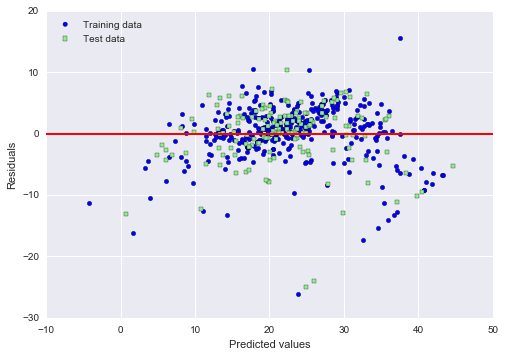

In [15]:
plt.scatter(y_train_pred, y_train_pred-y_train, c="blue",marker="o",label="Training data")
plt.scatter(y_test_pred,y_test_pred-y_test,c="lightgreen",marker="s",label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="red")
plt.xlim([-10,50])
plt.show()

In [17]:
print("MSE train: %.3f, test: %.3f"%(mean_squared_error(y_train,y_train_pred),
                                    mean_squared_error(y_test,y_test_pred)))

MSE train: 20.200, test: 25.843


In [19]:
print("R^2 train: %.3f, test %.3f"%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.762, test 0.690


In [21]:
X = df[["LSTAT"]].values
y = df[["MEDV"]].values
regr = LinearRegression()

In [22]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [24]:
X_fit = np.arange(X.min(), X.max(),1)[:,np.newaxis]
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

In [25]:
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

In [27]:
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

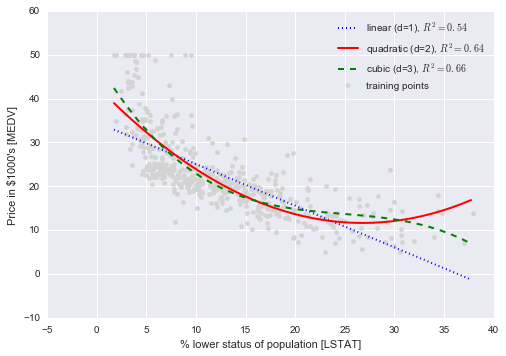

In [28]:
plt.scatter(X,y,label="training points",color="lightgray")
plt.plot(X_fit,y_lin_fit,label="linear (d=1), $R^2=%.2f$"% linear_r2,color="blue",
         lw=2,linestyle=":")
plt.plot(X_fit,y_quad_fit,label="quadratic (d=2), $R^2=%.2f$"% quadratic_r2,color="red",
         lw=2,linestyle="-")
plt.plot(X_fit,y_cubic_fit,label="cubic (d=3), $R^2=%.2f$"% cubic_r2,color="green",
         lw=2,linestyle="--")
plt.xlabel("% lower status of population [LSTAT]")
plt.ylabel("Price in $1000's [MEDV]")
plt.legend(loc="upper right")
plt.show()


In [30]:
X = df[["LSTAT"]].values
y = df[["MEDV"]].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()


In [32]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
fortest = RandomForestRegressor(n_estimators=1000,criterion="mse",random_state=1,n_jobs=-1)
fortest.fit(X_train,y_train)
y_train_pred = fortest.predict(X_train)
y_test_pred = fortest.predict(X_test)
print("MSE train: %.3f, test: %.3f"%(mean_squared_error(y_train,y_train_pred),
                                    mean_squared_error(y_test,y_test_pred)))
print("R^2 train: %.3f, test: %.3f"%(r2_score(y_train,y_train_pred),
                                    r2_score(y_test,y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878
